In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")

In [39]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
cars = pd.read_csv('https://stepik.org/media/attachments/lesson/387691/cars.csv')

In [3]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### 1. EDA

In [4]:
cars.shape

(205, 26)

In [5]:
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
cars.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

### 2. Сгенерируем первый признак

Использовать полное название машины – не самый хороший вариант, поэтому создадим новый признак – марку автомобиля (`company`). Для этого использую столбец `CarName`, разобью значения ячеек по пробелу и запишу в колонку первый элемент. 
    
Сколько всего уникальных марок машины встречается в датасете? Столбец `CarName` с полным названием машины удалю из датасета, а также `car_ID`, так как они не пригодятся для дальнейшего анализа.

In [7]:
brand_name = 'alfa-romero Quadrifoglio' #тренировка

In [8]:
brand_name.split(' ')[0]

'alfa-romero'

In [9]:
cars['mark'] = cars.CarName.apply(lambda CarName: CarName.split(' ')[0])

In [10]:
cars.mark

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: mark, Length: 205, dtype: object

In [12]:
cars.drop(columns=['CarName', 'car_ID'])

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mark
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [13]:
cars.mark.value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
alfa-romero     3
jaguar          3
chevrolet       3
maxda           2
renault         2
vw              2
toyouta         1
porcshce        1
vokswagen       1
Nissan          1
mercury         1
Name: mark, dtype: int64

In [14]:
cars.mark.nunique()

28

In [15]:
### 3. Так как в данных есть имена с ошибками, исправлю их

In [17]:
cars['mark']= cars.mark.replace('maxda','mazda')
cars['mark']= cars.mark.replace('porcshce','porsche')
cars['mark']= cars.mark.replace('toyouta', 'toyota')      
cars['mark']= cars.mark.replace('vokswagen','volkswagen') 
cars['mark']= cars.mark.replace('vw' ,'volkswagen') 
cars['mark'] = cars.mark.str.lower()

In [18]:
cars.mark.nunique()

22

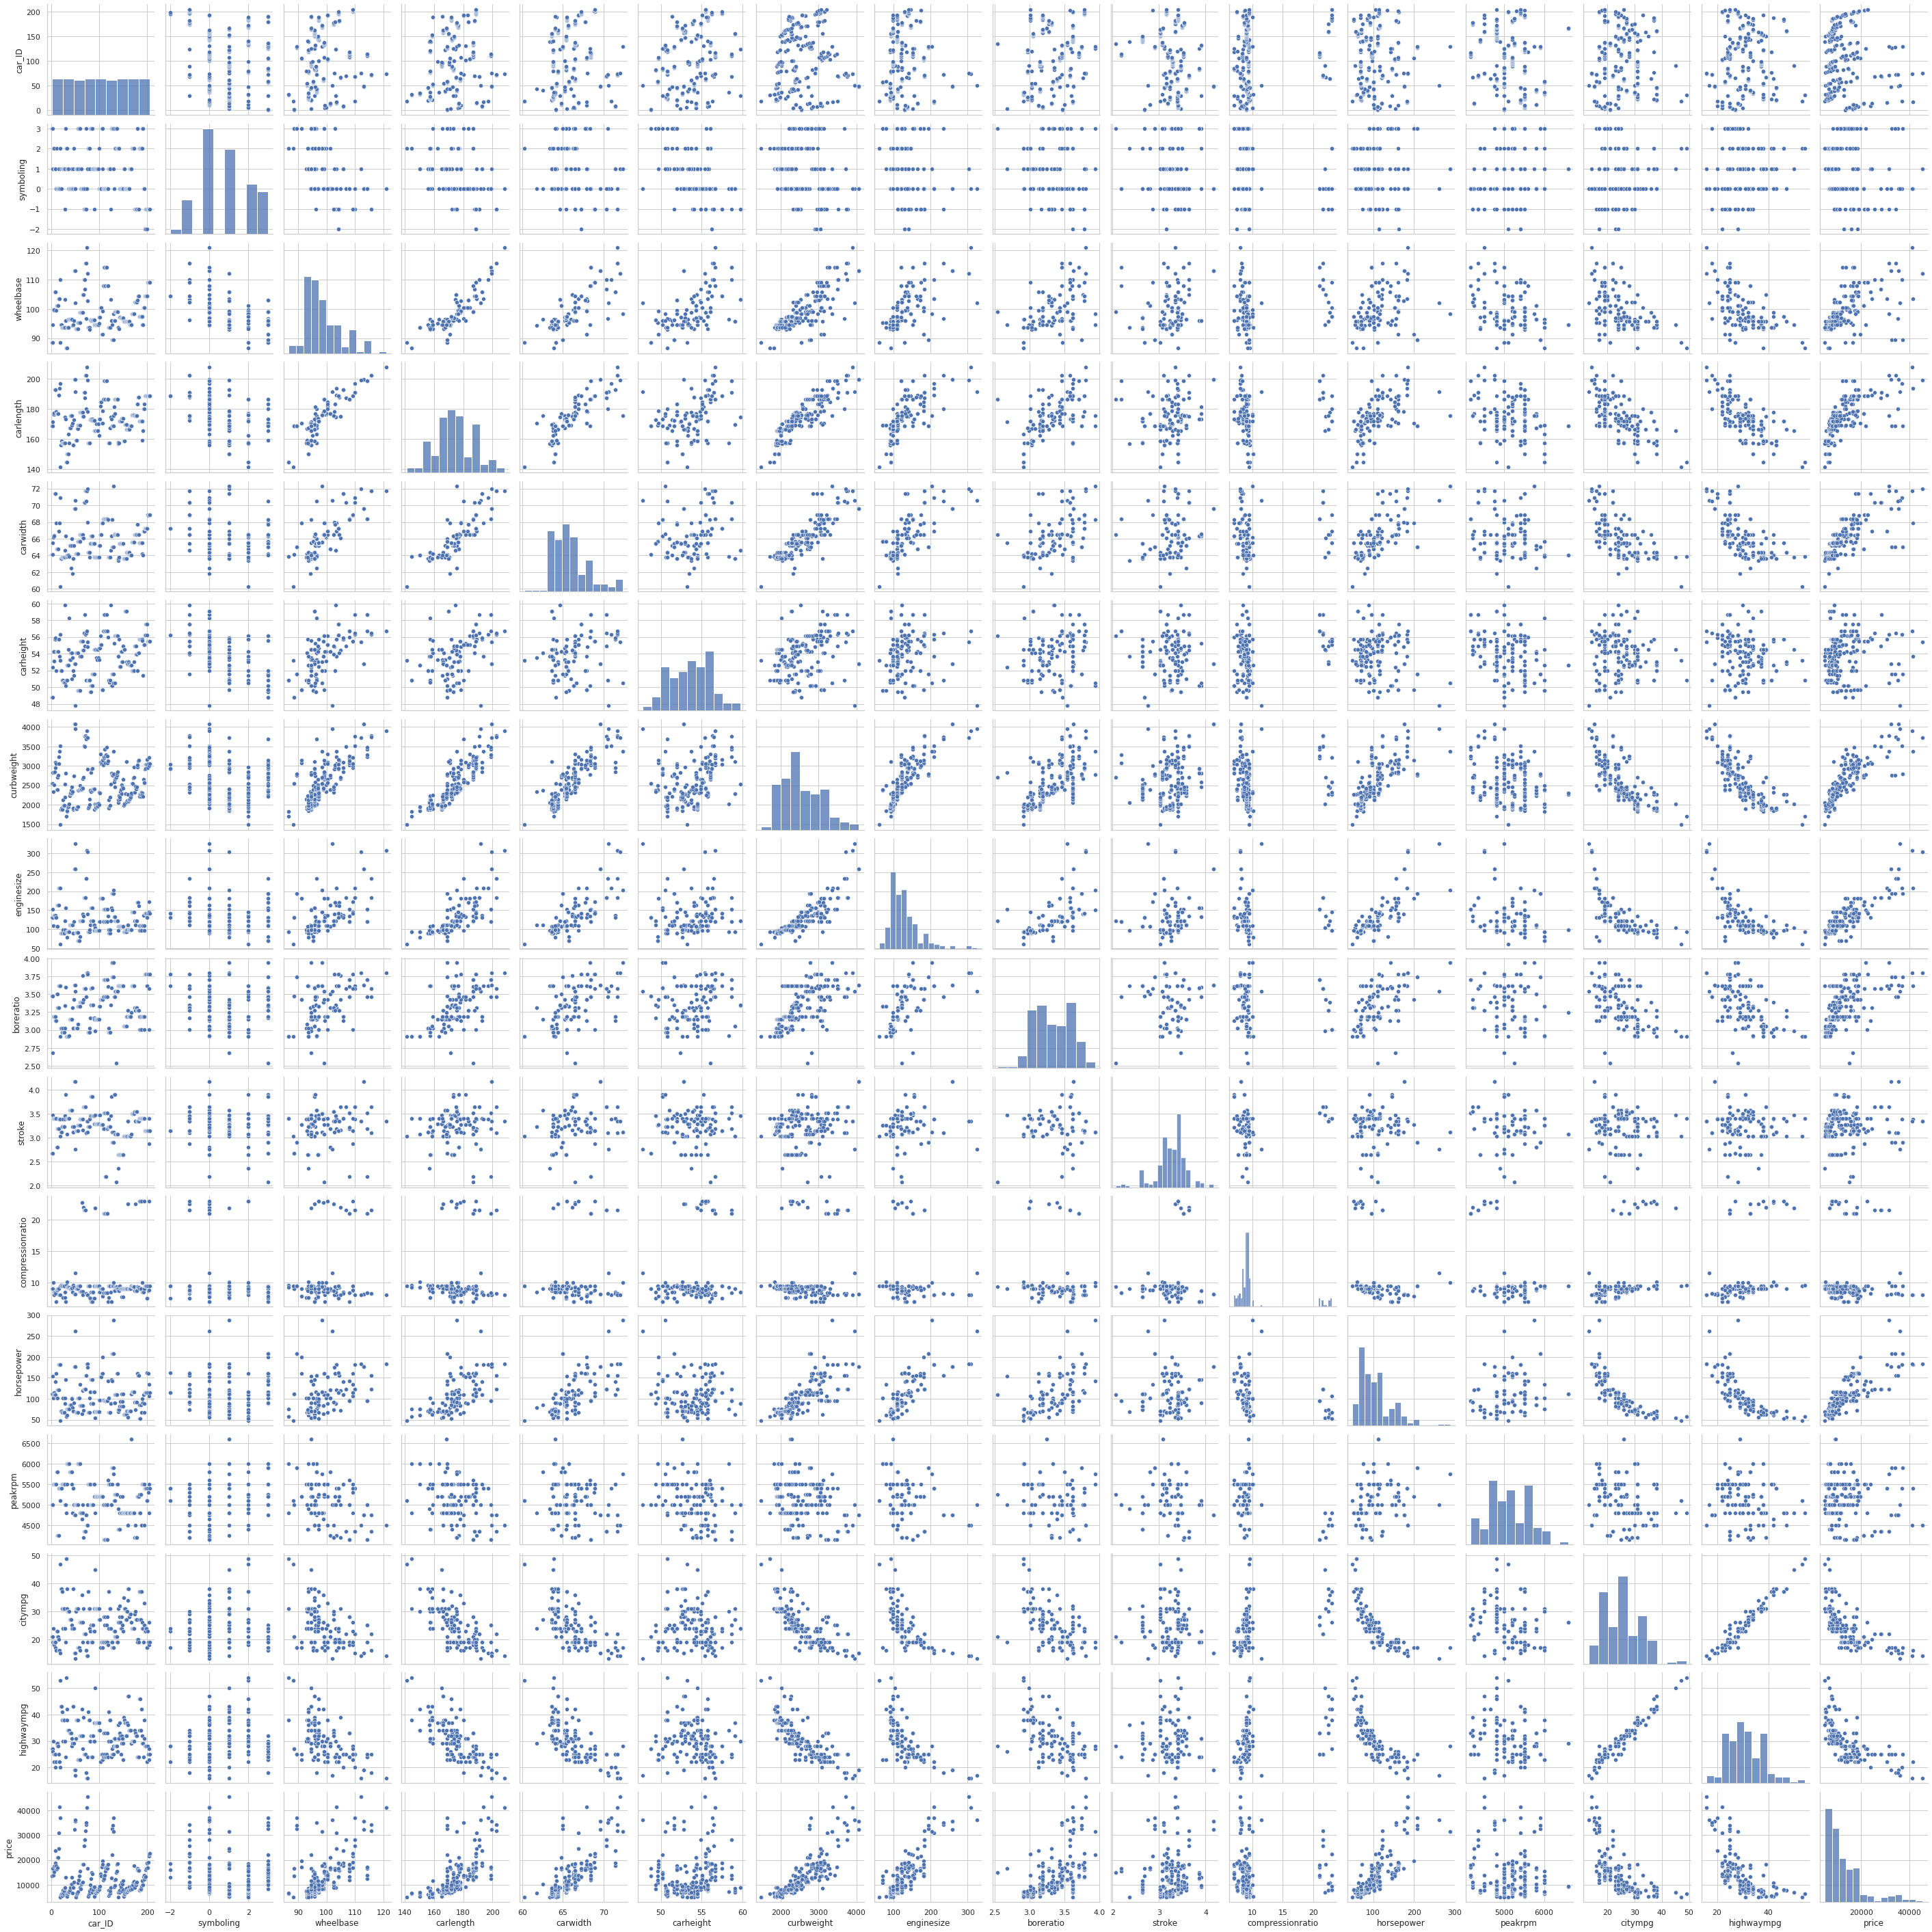

In [19]:
sns.pairplot(cars)
plt.show()

### 4.  Чтобы не перегружать модель большим количеством предикторов, оставлю только часть из них:

    'company', 'fueltype', 'aspiration','carbody', 'drivewheel', 'wheelbase', 'carlength','carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower'
также не забыв про то, что мы предсказываем – `'price'`. 

Посчитаю корреляцию между `price` и другими переменными.

In [25]:
cols_to_keep = ['mark','fueltype', 'aspiration','carbody', 'drivewheel', 'wheelbase', 'carlength','carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'price']

In [26]:
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'mark'],
      dtype='object')

In [27]:
df = cars[cols_to_keep]

In [29]:
df.corr().round(2)

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price
wheelbase,1.00,0.87,0.80,0.78,0.57,0.49,0.35,0.58
carlength,0.87,1.00,0.84,0.88,0.68,0.61,0.55,0.68
carwidth,0.80,0.84,1.00,0.87,0.74,0.56,0.64,0.76
curbweight,0.78,0.88,0.87,1.00,0.85,0.65,0.75,0.84
enginesize,0.57,0.68,0.74,0.85,1.00,0.58,0.81,0.87
boreratio,0.49,0.61,0.56,0.65,0.58,1.00,0.57,0.55
horsepower,0.35,0.55,0.64,0.75,0.81,0.57,1.00,0.81
price,0.58,0.68,0.76,0.84,0.87,0.55,0.81,1.00


In [30]:
df.dtypes

mark               object
fueltype           object
aspiration         object
carbody            object
drivewheel         object
wheelbase         float64
carlength         float64
carwidth          float64
curbweight          int64
enginetype         object
cylindernumber     object
enginesize          int64
boreratio         float64
horsepower          int64
price             float64
dtype: object

In [31]:
corr_mat = df.corr()
corr_mat["price"].sort_values(ascending=False).round(2)

price         1.00
enginesize    0.87
curbweight    0.84
horsepower    0.81
carwidth      0.76
carlength     0.68
wheelbase     0.58
boreratio     0.55
Name: price, dtype: float64

### 5. Последний шаг в подготовке данных: линейная регрессия в python не справляется с категориальными переменными (типом object в pandas), поэтому применю `pd.get_dummies()`

In [41]:
cars_lr = pd.get_dummies(df, drop_first=True)
cars_lr.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mark_audi,mark_bmw,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,1,0,...,1,0,0,0,1,0,0,0,0,0


###  6. Сначала построю маленькую модель всего с одним предиктором цены (price) – horsepower.

Какой процент изменчивости объясняет полученная модель? ($R^2$)

In [42]:
results = smf.ols('price ~ horsepower', cars_lr).fit()
print(results.summary()) #R-squared: 65 процентов

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           1.48e-48
Time:                        23:41:21   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3721.7615    929.849     -4.003      0.0

In [43]:
cars_lr["horsepower_cent"] = cars_lr["horsepower"] - cars_lr["horsepower"].mean()

results_cent = smf.ols('price ~ horsepower_cent', cars_lr).fit()
print(results_cent.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           1.48e-48
Time:                        23:42:30   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.328e+04    329.446     

In [44]:
1.328e+04 #Intercept

13280.0

In [45]:
cars_lr["horsepower"].mean()

104.1170731707317

In [46]:
cars_lr["horsepower_cent"]

0       6.882927
1       6.882927
2      49.882927
3      -2.117073
4      10.882927
         ...    
200     9.882927
201    55.882927
202    29.882927
203     1.882927
204     9.882927
Name: horsepower_cent, Length: 205, dtype: float64

In [47]:
cars_lr["horsepower_cent"].mean()

5.47637815854126e-15

In [48]:
cars_lr.drop("horsepower_cent", inplace=True, axis=1)

### 7. Теперь – две модели:

- модель со всеми предикторами
- модель со всеми предикторами, кроме марок машин

In [50]:
X = cars_lr.drop(['price'], axis='columns')
y = cars_lr['price']

In [51]:
#не забываем про константу
X = sm.add_constant(X)

In [52]:
X

,const,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,mark_audi,mark_bmw,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,1.0,88.6,168.8,64.1,2548,130,3.47,111,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1.0,88.6,168.8,64.1,2548,130,3.47,111,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1.0,94.5,171.2,65.5,2823,152,2.68,154,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1.0,99.8,176.6,66.2,2337,109,3.19,102,1,0,...,1,0,0,0,0,1,0,0,0,0
4,1.0,99.4,176.6,66.4,2824,136,3.19,115,1,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.0,109.1,188.8,68.9,2952,141,3.78,114,0,0,...,1,0,0,0,0,1,0,0,0,0
201,1.0,109.1,188.8,68.8,3049,141,3.78,160,0,0,...,1,0,0,0,0,1,0,0,0,0
202,1.0,109.1,188.8,68.9,3012,173,3.58,134,0,0,...,0,0,1,0,0,0,1,0,0,0
203,1.0,109.1,188.8,68.9,3217,145,3.01,106,0,0,...,1,0,0,0,0,0,1,0,0,0


In [53]:
model_1 = sm.OLS(y, X).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     81.09
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           4.86e-89
Time:                        23:46:37   Log-Likelihood:                -1804.2
No. Observations:                 205   AIC:                             3702.
Df Residuals:                     158   BIC:                             3858.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.472e+

In [54]:
cols_to_keep = cars_lr.columns[~cars_lr.columns.str.startswith('company_')]
cols_to_keep

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'price', 'mark_audi', 'mark_bmw',
       'mark_buick', 'mark_chevrolet', 'mark_dodge', 'mark_honda',
       'mark_isuzu', 'mark_jaguar', 'mark_mazda', 'mark_mercury',
       'mark_mitsubishi', 'mark_nissan', 'mark_peugeot', 'mark_plymouth',
       'mark_porsche', 'mark_renault', 'mark_saab', 'mark_subaru',
       'mark_toyota', 'mark_volkswagen', 'mark_volvo', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [55]:
X = cars_lr[cols_to_keep].drop('price', axis='columns')
y = cars_lr['price']

In [56]:
X = sm.add_constant(X)

In [57]:
model_2 = sm.OLS(y, X).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     81.09
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           4.86e-89
Time:                        23:47:27   Log-Likelihood:                -1804.2
No. Observations:                 205   AIC:                             3702.
Df Residuals:                     158   BIC:                             3858.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.472e+

In [96]:
results = smf.ols('price ~ horsepower + mark + fueltype + aspiration + carbody + drivewheel + wheelbase + carlength + carwidth + curbweight + enginetype + cylindernumber + enginesize + boreratio', df_2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     81.09
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           4.86e-89
Time:                        13:57:46   Log-Likelihood:                -1804.2
No. Observations:                 205   AIC:                             3702.
Df Residuals:                     158   BIC:                             3858.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [97]:
results = smf.ols('price ~ horsepower + fueltype + aspiration + carbody + drivewheel + wheelbase + carlength + carwidth + curbweight + enginetype + cylindernumber + enginesize + boreratio', df_2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     72.32
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           9.86e-81
Time:                        13:58:02   Log-Likelihood:                -1881.6
No. Observations:                 205   AIC:                             3817.
Df Residuals:                     178   BIC:                             3907.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### Вывод:
Выбранная модель объясняет примерно **90**% дисперсии. Среди предикторов **10** из 27 оказались не значимыми (p > 0.05). Пример интерпретации: при единичном изменении показателя horsepower, цена **возрастет** на 86.8164.

Можно еще 
### Поискать источники мультиколлинеарности

In [58]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

/opt/tljh/user/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [59]:
vif_data

,feature,VIF
0,const,8427.397282
1,wheelbase,12.837874
2,carlength,22.216861
3,carwidth,12.899515
4,curbweight,41.338641
5,enginesize,59.052440
6,boreratio,13.839704
7,horsepower,30.863273
8,mark_audi,9.125247
9,mark_bmw,10.173756


### Сделать лог-трансформацию зависимой переменной

<AxesSubplot:xlabel='price', ylabel='Count'>

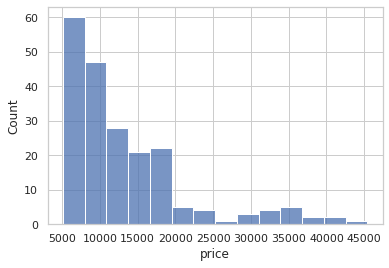

In [60]:
sns.histplot(y)

In [61]:
y_log = np.log(y)
y_log

0       9.510075
1       9.711116
2       9.711116
3       9.543235
4       9.767095
         ...    
200     9.731809
201     9.854560
202     9.975110
203    10.019936
204    10.026811
Name: price, Length: 205, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

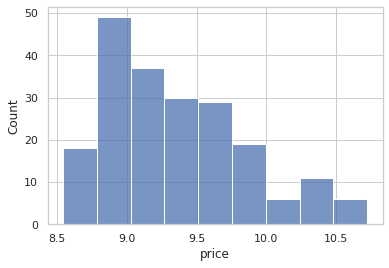

In [62]:
sns.histplot(y_log)

In [63]:
model_log = sm.OLS(y_log, X).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     77.96
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           9.19e-88
Time:                        23:50:19   Log-Likelihood:                 174.61
No. Observations:                 205   AIC:                            -255.2
Df Residuals:                     158   BIC:                            -99.04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.63

### Использовать обобщённую линейную модель

In [64]:
model_gamma = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.log())).fit()
print(model_gamma.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                  205
Model:                            GLM   Df Residuals:                      158
Model Family:                   Gamma   Df Model:                           46
Link Function:                    log   Scale:                        0.013658
Method:                          IRLS   Log-Likelihood:                -1745.8
Date:                Mon, 21 Aug 2023   Deviance:                       2.1741
Time:                        23:50:48   Pearson chi2:                     2.16
No. Iterations:                    14   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.70